## EDA + FEATURE SELECTION

In [27]:
#Importing main libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("/Users/paulacamprecios/Documents/Master - Pontia/5.ML and Deep Learning/ml-dl-trabajo-final/data/dataset_practica_final.csv")

In [7]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [34]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [15]:
df.columns[df.isna().sum() > 1]

Index(['children', 'country', 'agent', 'company'], dtype='object')

In [21]:
df[['children', 'country', 'agent', 'company']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   children  119386 non-null  float64
 1   country   118902 non-null  object 
 2   agent     103050 non-null  float64
 3   company   6797 non-null    float64
dtypes: float64(3), object(1)
memory usage: 3.6+ MB


In [22]:
df_filled = df.copy()
df_filled[df.select_dtypes(include='number').columns] = df.select_dtypes(include='number').fillna(0)

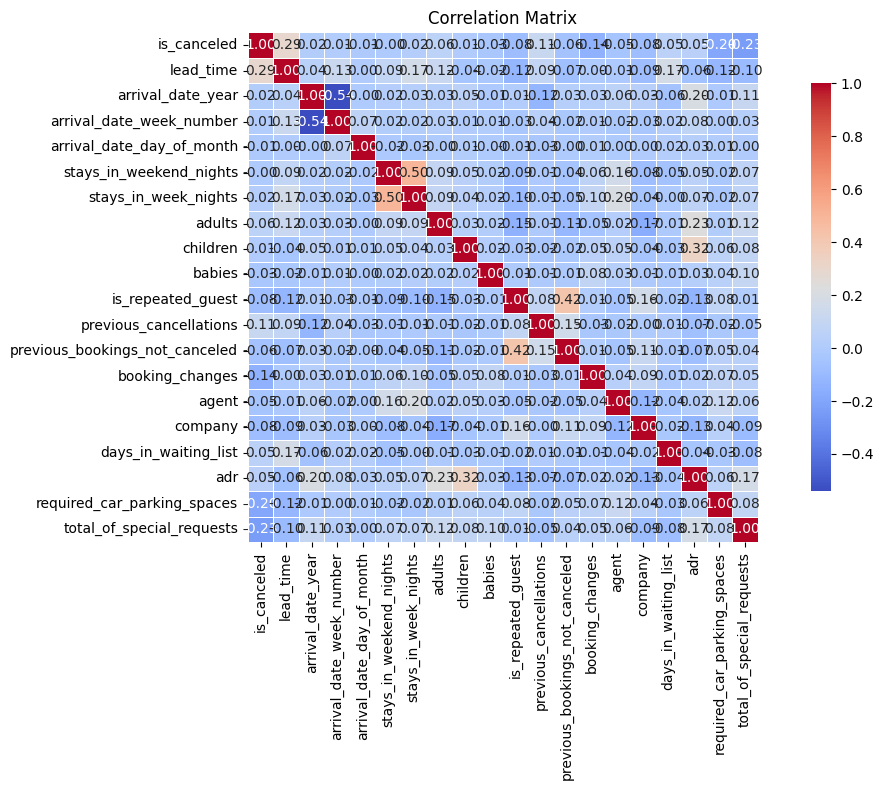

In [28]:
corr_matrix = df_filled.select_dtypes(include='number').corr()
plt.figure(figsize=(12, 8))  # Ajusta el tamaño a tu gusto
sns.heatmap(
    corr_matrix, 
    annot=True,           
    fmt=".2f",            
    cmap="coolwarm",      
    square=True,
    linewidths=0.5, 
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

arrival_date_week_number y arrival_date_year tienen alta correlación y puede indicar colinealidad, por lo que como no podemos escoge rentre ambas ya que aportan diferentes informaciones, por lo que pensamos aplicar feature engineering para reducirla a una. 

/var/folders/57/tmzyl2qx7496jfqbnjvhrr2r0000gn/T/ipykernel_94075/4010611664.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_filled, x='is_canceled', palette='Set2')
/var/folders/57/tmzyl2qx7496jfqbnjvhrr2r0000gn/T/ipykernel_94075/4010611664.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No cancelado (0)', 'Cancelado (1)'])


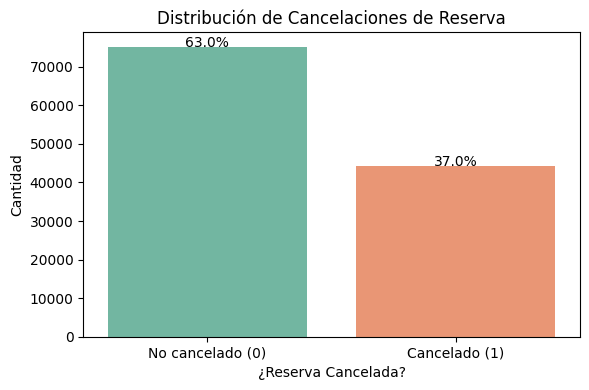

In [46]:
percentages = df_filled['is_canceled'].value_counts(normalize=True) * 100
labels = [f'{int(val)} ({percentages[val]:.1f}%)' for val in percentages.index]

# Plot
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df_filled, x='is_canceled', palette='Set2')

# Agregar porcentajes encima de las barras
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 0.5,
            f'{percentages[i]:.1f}%', ha="center")

# Etiquetas y título
ax.set_xticklabels(['No cancelado (0)', 'Cancelado (1)'])
plt.title('Distribución de Cancelaciones de Reserva')
plt.ylabel('Cantidad')
plt.xlabel('¿Reserva Cancelada?')
plt.tight_layout()
plt.show()

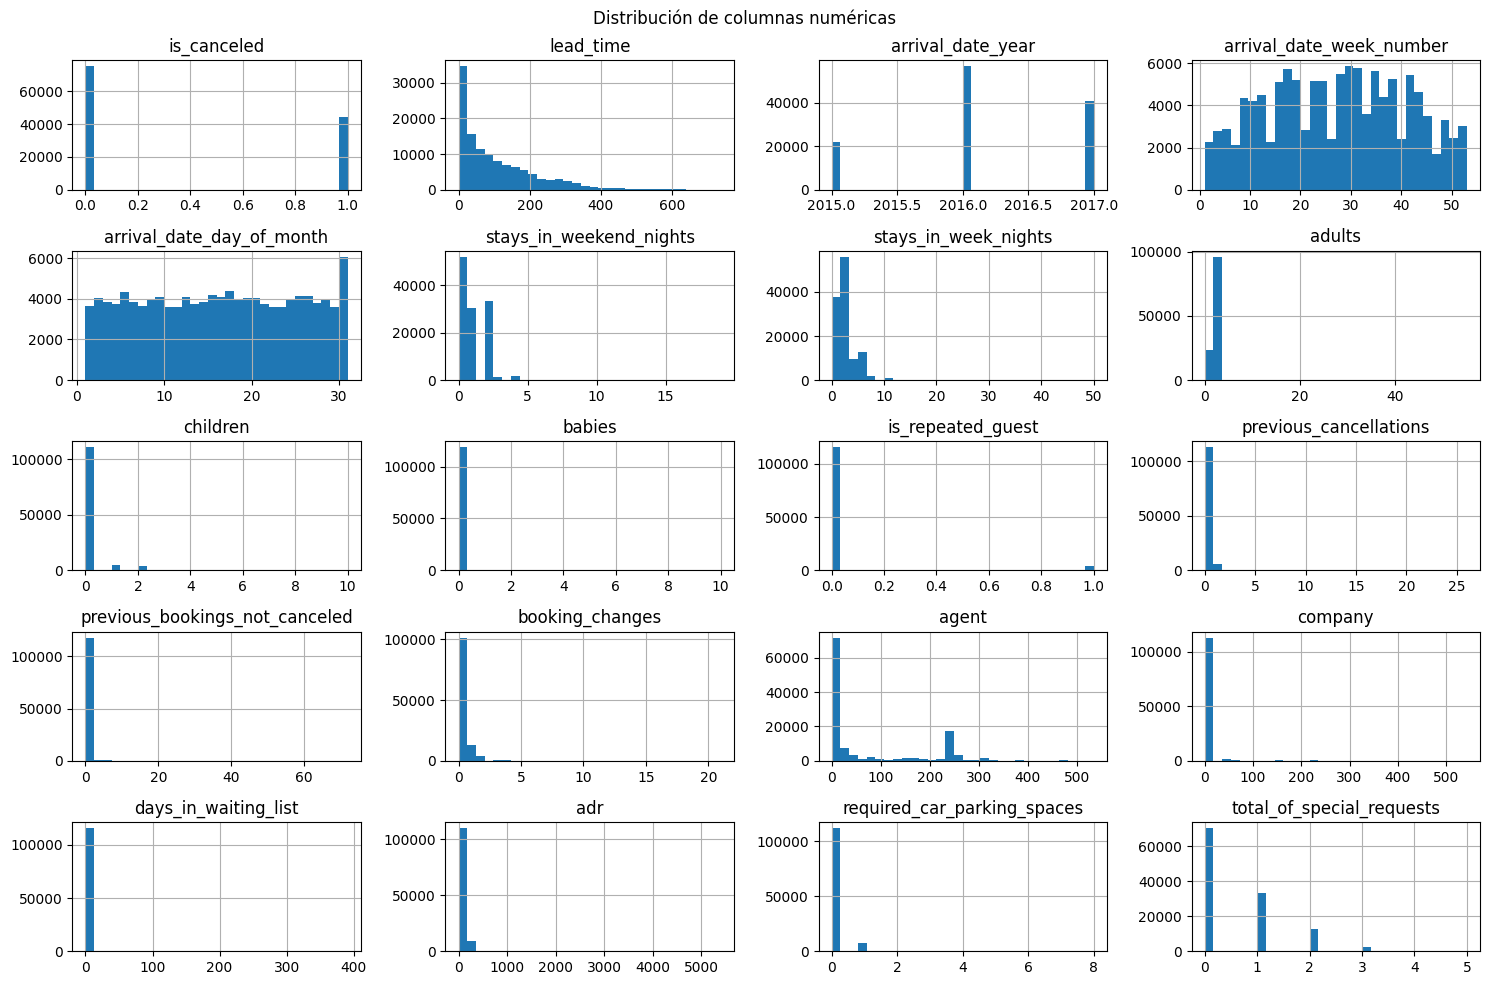

In [41]:
#Visualizar distribución de las columnas numèricas

numeric_cols = df_filled.select_dtypes(include='number').columns

df_filled[numeric_cols].hist(bins=30, figsize=(15, 10))
plt.suptitle("Distribución de columnas numéricas")
plt.tight_layout()
plt.show()


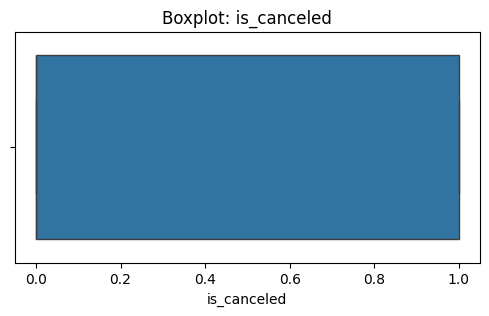

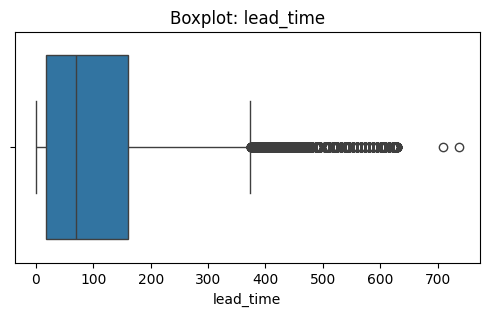

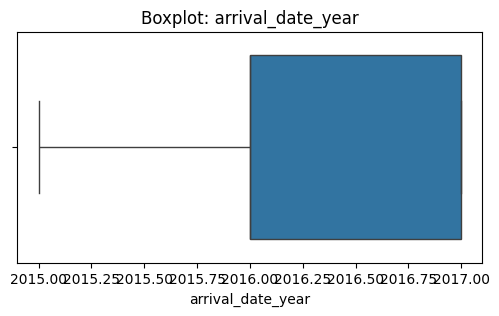

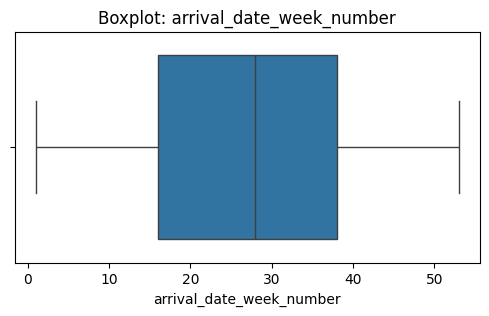

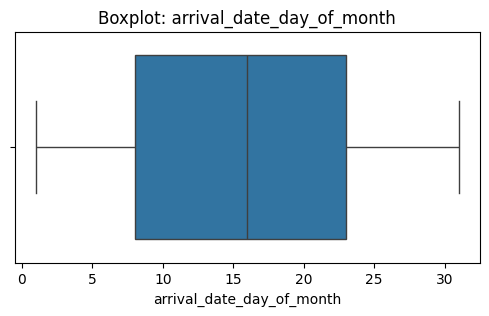

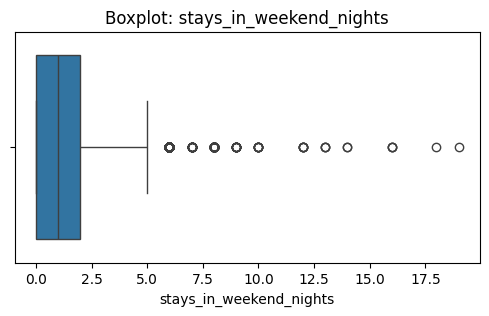

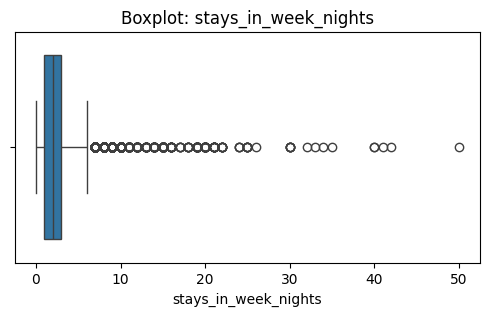

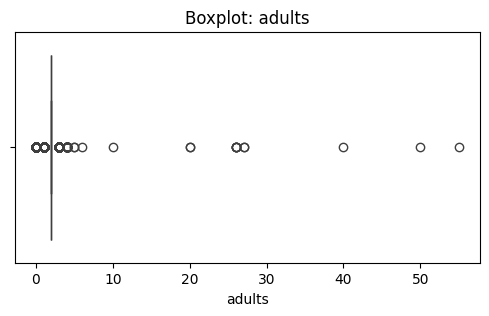

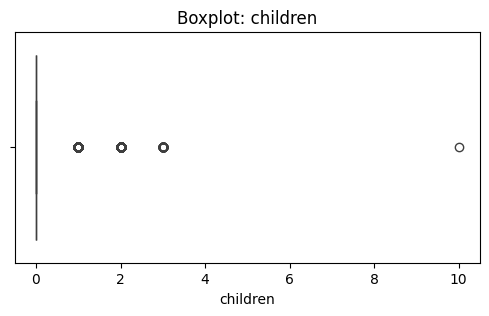

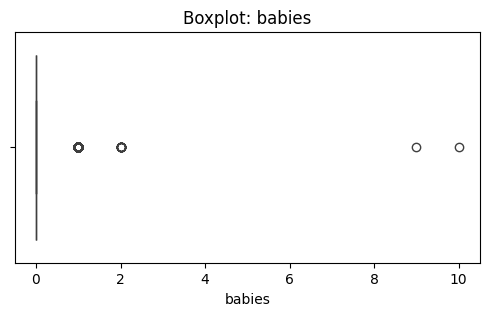

In [37]:
#Detección de outliers
for col in numeric_cols[:10]:  # Ajusta si hay muchas columnas
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df_filled[col])
    plt.title(f'Boxplot: {col}')
    plt.show()


Hay algunas variables con outliers però podrían haber ocurrido, por lo que no borraremos ninguno de los records.

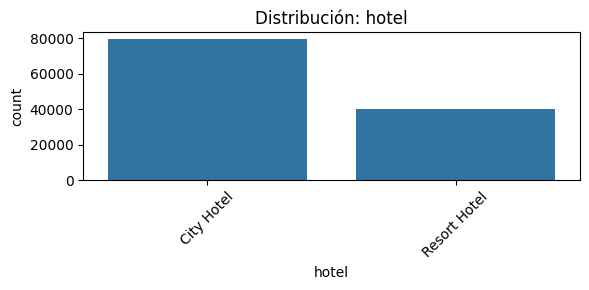

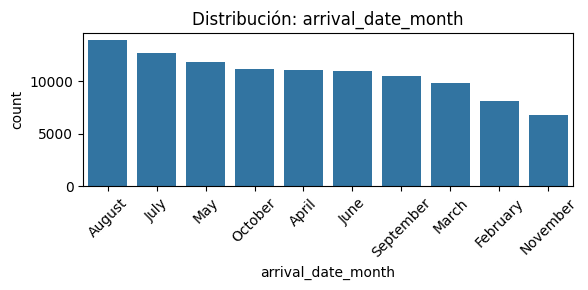

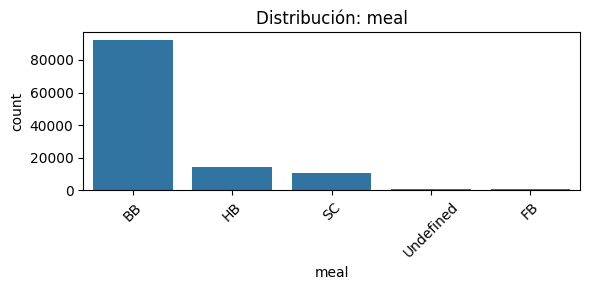

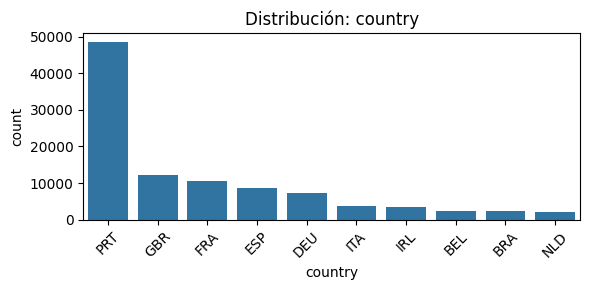

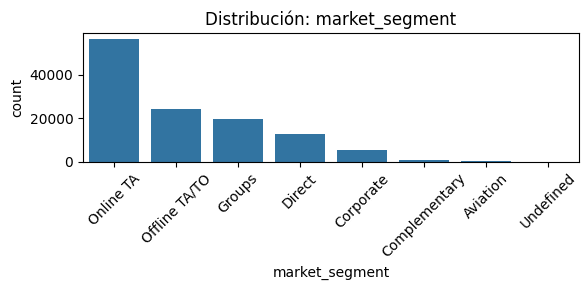

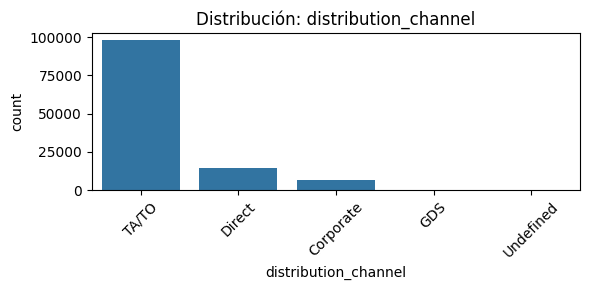

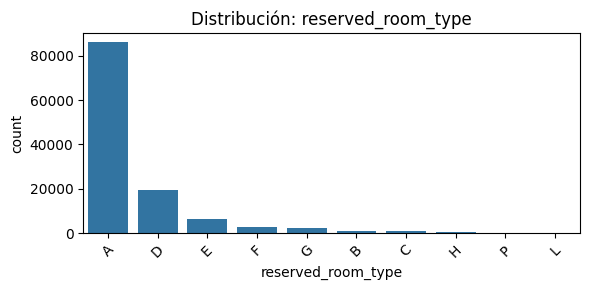

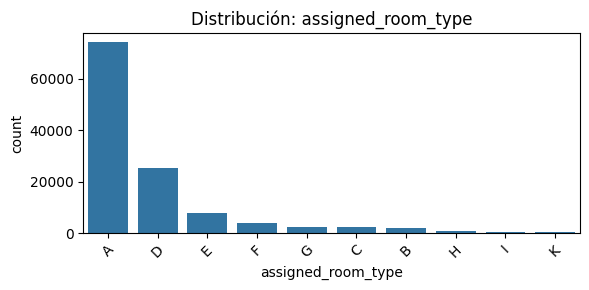

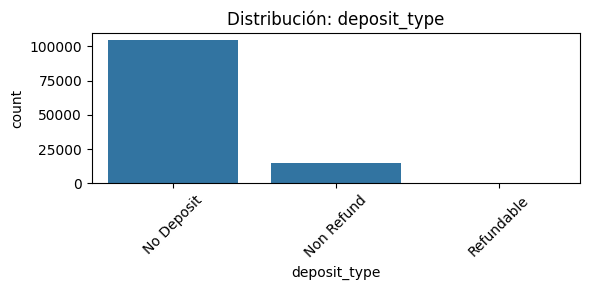

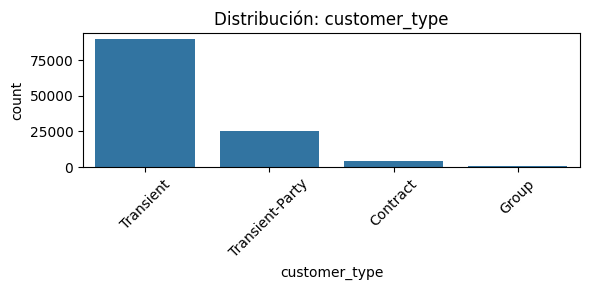

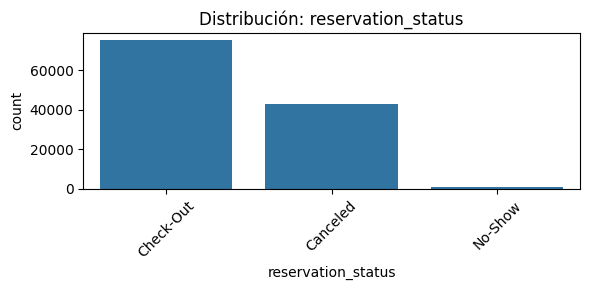

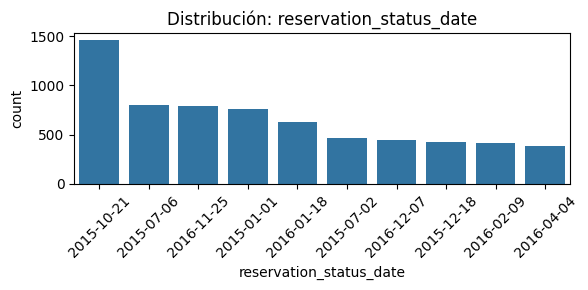

In [45]:
cat_cols = df[df['is_canceled'] == 1].select_dtypes(include='object').columns

for col in cat_cols: 
    plt.figure(figsize=(6, 3))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index[:10])
    plt.title(f'Distribución: {col}')
    
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Todas las variables parecen relevantes.
No hay correlaciones evidentes entre las columnas excepto arrival_date_week_number y arrival_date_year que decidimos aplicar feature engineering y convertirla en una sola o aplicaremos PCA en todo el dataset.
Hay algunos outliers pero nos interesa dejarlos y ver como se comporta el modelo.
Las columnas de reservation status y reservation status date, las voy a eliminar porque están estrechamente relacionadas con el target.